# BUSINESS ANALYTICS

To Find out the weak areas where you can work to make more profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Data Description*

In [3]:
data = pd.read_csv("D:\Sparks_intern\SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Visualization

In [13]:
import seaborn as sns

In [14]:
data['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

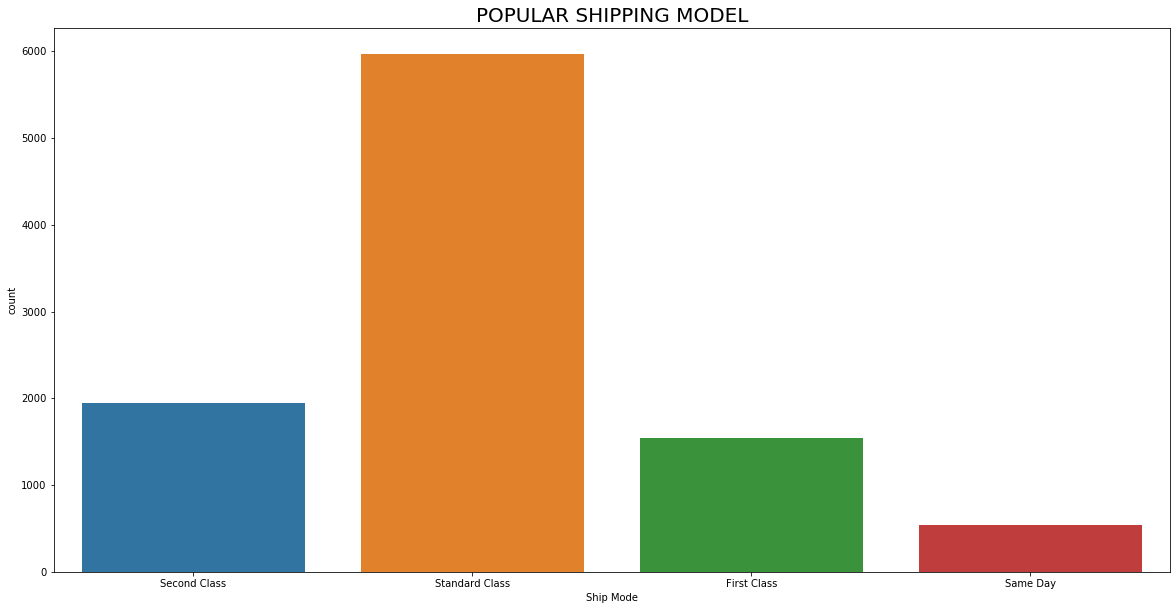

In [15]:

plt.figure(figsize = (20,10))
sns.countplot(data['Ship Mode'])
plt.title("POPULAR SHIPPING MODEL",size = 20)
plt.show()

# Order Quantity

In [17]:
grp = data.groupby('Segment')['Quantity'].sum().reset_index()
grp

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


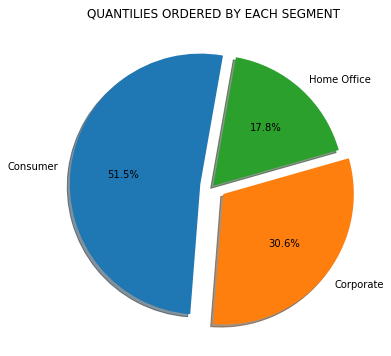

In [18]:
labels = data['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(grp['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0),shadow=True,startangle=80)
plt.title('QUANTILIES ORDERED BY EACH SEGMENT')
plt.show()

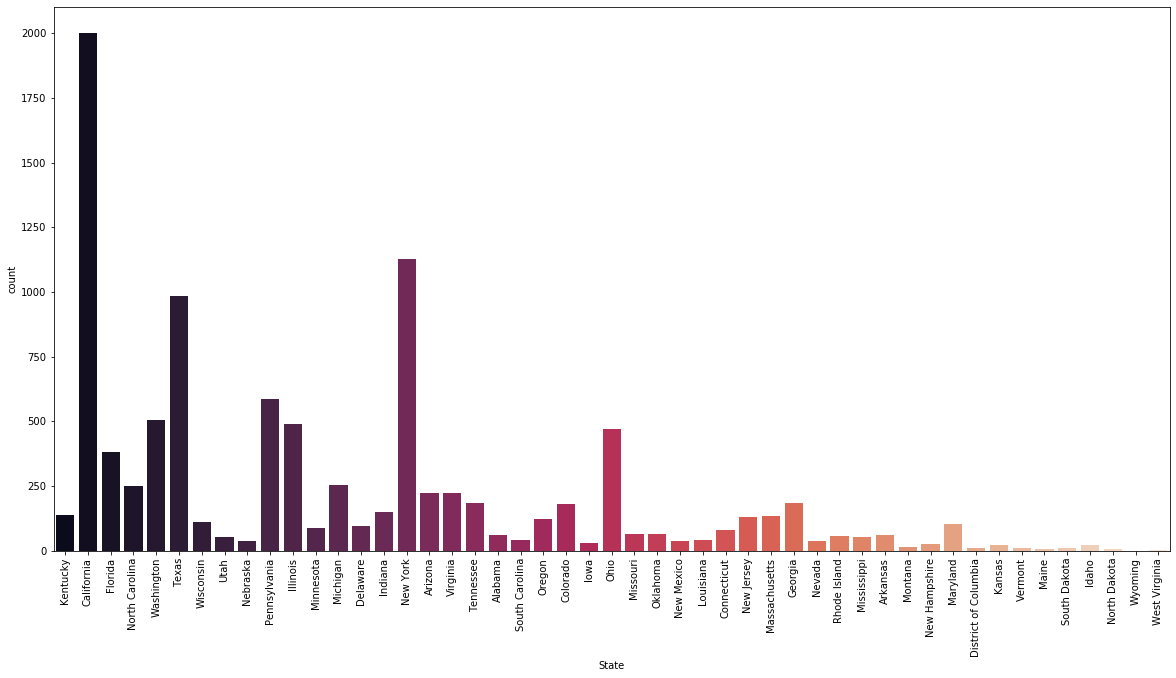

In [19]:
plt.figure(figsize =(20,10))
sns.countplot(data['State'],palette = 'rocket')
plt.xticks(rotation = 90)
plt.show()

# Top 10 Cities with High quantity

In [21]:
top10_city = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
top10_city.head(10)

,City,Quantity
329,New York City,3417
266,Los Angeles,2879
374,Philadelphia,1981
438,San Francisco,1935
452,Seattle,1590
207,Houston,1466
80,Chicago,1132
94,Columbus,836
437,San Diego,670
464,Springfield,649


<Figure size 1440x720 with 0 Axes>

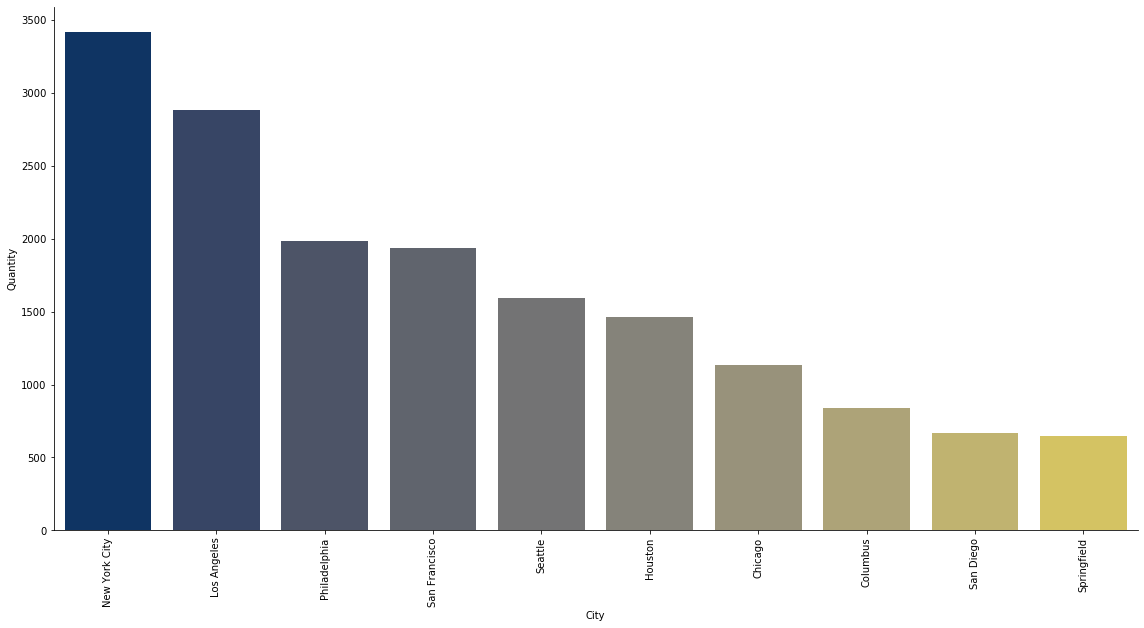

In [23]:
plt.figure(figsize = (20,10))
sns.catplot('City','Quantity',data = top10_city.head(10),kind = 'bar',height=8,aspect=2,palette='cividis')
plt.xticks(rotation=90)
plt.show()

# REGION WISE QUANTITY

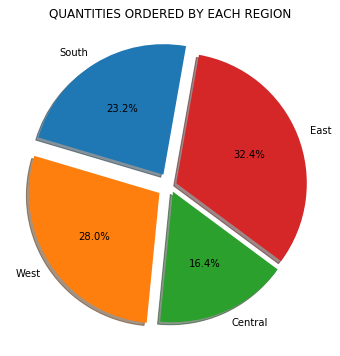

In [25]:
region  = data.groupby('Region')['Quantity'].sum().reset_index()
labels = data['Region'].unique()
plt.figure(figsize=(8,6))
plt.pie(region['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05,0.05),shadow=True,startangle=80)
plt.title('QUANTITIES ORDERED BY EACH REGION')
plt.show()

# TYPE OF PRODUCTS SOLD

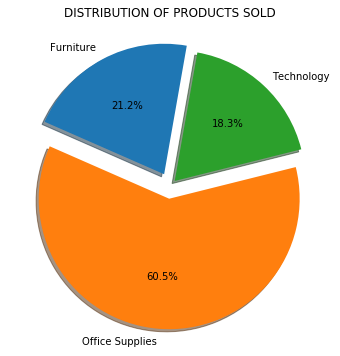

In [27]:
cat = data.groupby('Category')['Quantity'].sum().reset_index()
labels = data['Category'].unique()
plt.figure(figsize=(8,6))
plt.pie(cat['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.1,0.1,0.05),shadow=True,startangle=80)
plt.title('DISTRIBUTION OF PRODUCTS SOLD')
plt.show()

# TOP 10 PROFITABLE SELLING ITEMS

In [28]:
items = data.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
items.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


Text(0.5, 6.799999999999997, 'PRODUCTS')

<Figure size 1440x720 with 0 Axes>

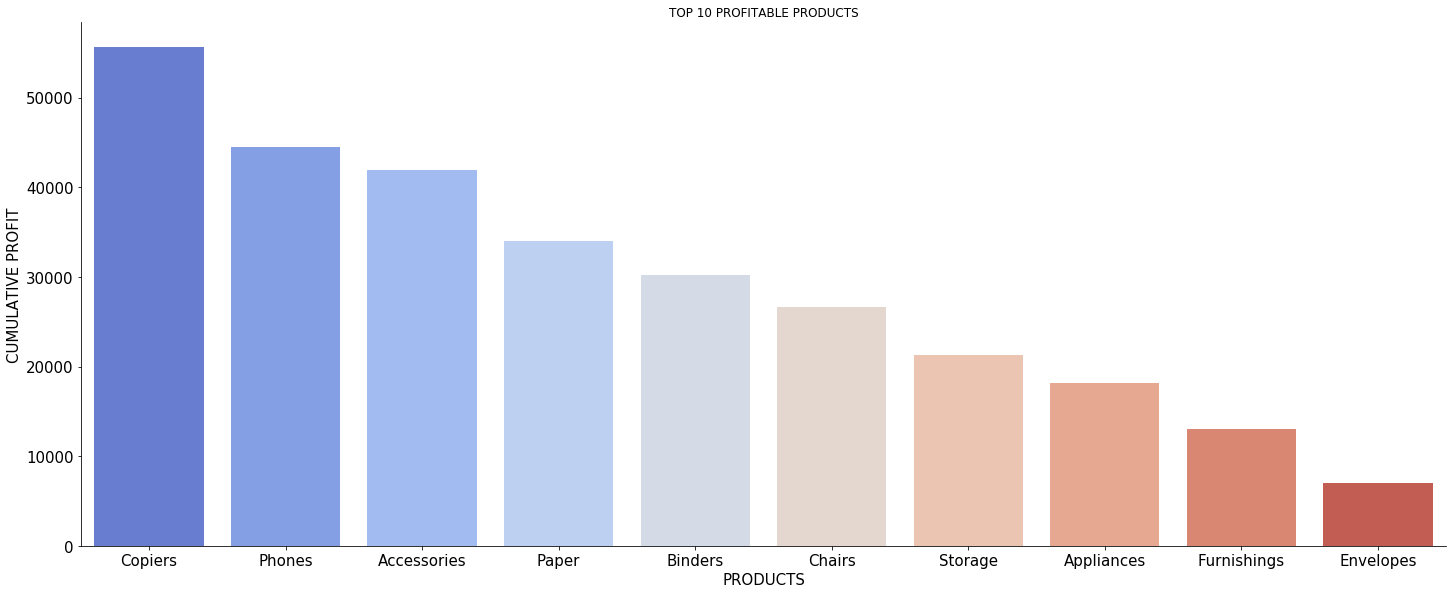

In [29]:
plt.figure(figsize =(20,10))
sns.catplot('Sub-Category','Profit',data=items.head(10),kind='bar',aspect=2.5,height=8,palette='coolwarm')
plt.title('TOP 10 PROFITABLE PRODUCTS')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('CUMULATIVE PROFIT',size=15)
plt.xlabel('PRODUCTS',size=15)

# TOP 10 PROFITABLE CITIES

In [30]:
city = data.groupby('City')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
city.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


Text(0.5, 6.799999999999997, 'CITY')

<Figure size 1440x720 with 0 Axes>

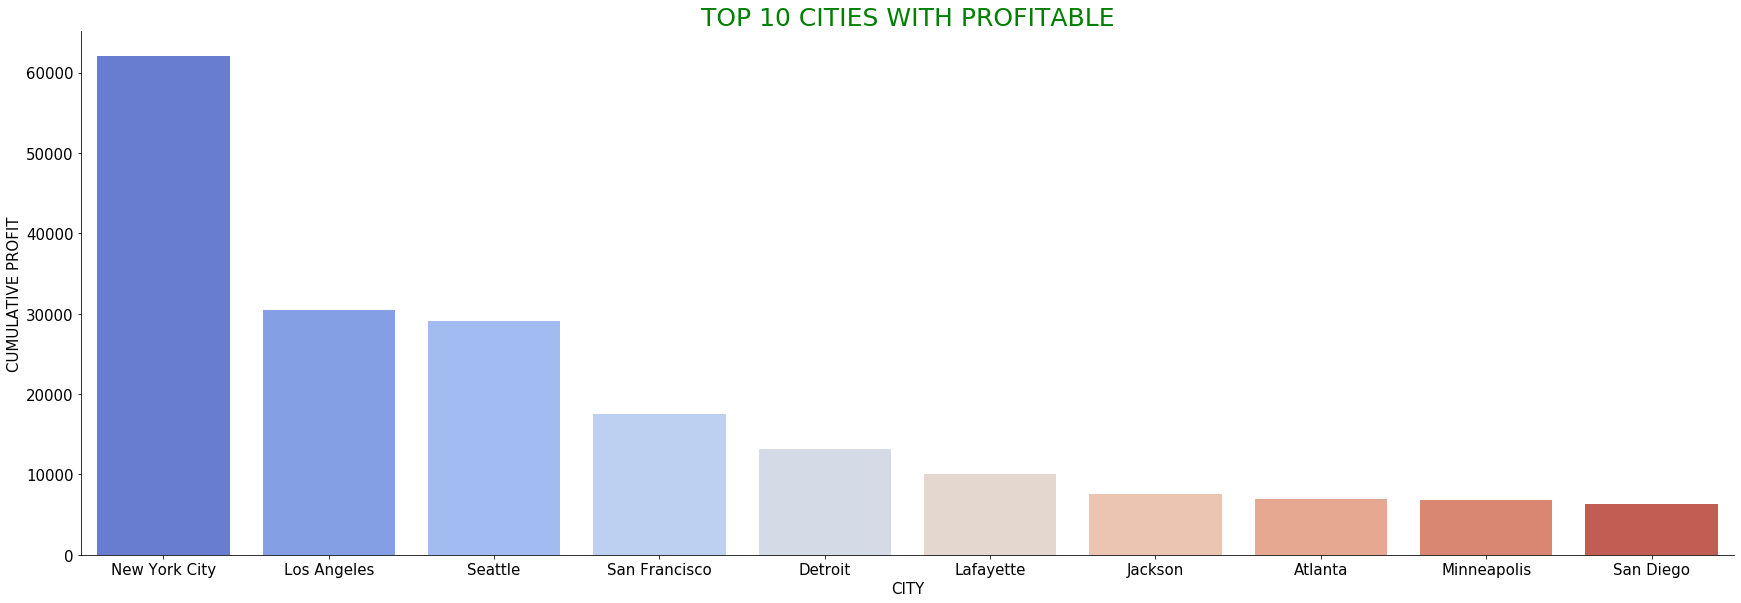

In [31]:
plt.figure(figsize =(20,10))
sns.catplot('City','Profit',data=city.head(10),kind='bar',aspect=3,height=8,palette='coolwarm')
plt.title('TOP 10 CITIES WITH PROFITABLE',size=25,color = 'Green')
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('CUMULATIVE PROFIT',size=15)
plt.xlabel('CITY',size=15)